In [80]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
ath = pd.read_csv('attributeDifferences.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head()

,sexFirst,sportFirst,eventFirst,heightDiff,weightDiff
0,M,Gymnastics,Gymnastics Men's Horizontal Bar,8.66,-6.80
1,M,Athletics,Athletics Men's 100 metres,-0.11,2.42
2,M,Athletics,Athletics Men's Shot Put,21.37,59.58
3,M,Gymnastics,Gymnastics Men's Horse Vault,4.65,-8.00
4,M,Gymnastics,Gymnastics Men's Parallel Bars,8.72,-7.55


In [82]:
female = ath[~ath.sexFirst.str.contains("M")]
male = ath[~ath.sexFirst.str.contains("F")]

In [83]:
topHeightMale = male.nlargest(10, ['heightDiff'])
topHeightFemale = female.nlargest(10, ['heightDiff'])

In [84]:
bottomHeightMale = male.nsmallest(10, ['heightDiff'])
bottomHeightFemale = female.nsmallest(10, ['heightDiff'])

In [85]:
topWeightMale = male.nlargest(10, ['weightDiff'])
topWeightFemale = female.nlargest(10, ['weightDiff'])
bottomWeightMale = male.nsmallest(10, ['weightDiff'])
bottomWeightFemale = female.nsmallest(10, ['weightDiff'])

In [86]:
combinedHeightMale = topHeightMale.append(bottomHeightMale)

combinedHeightFemale = topHeightFemale.append(bottomHeightFemale)

combinedWeightMale = topWeightMale.append(bottomWeightMale)

combinedWeightFemale = topWeightFemale.append(bottomWeightFemale)


# Which events have had the biggest change in the athletes attributes from when they were first included in the Olympics, to the most recent running of that event?

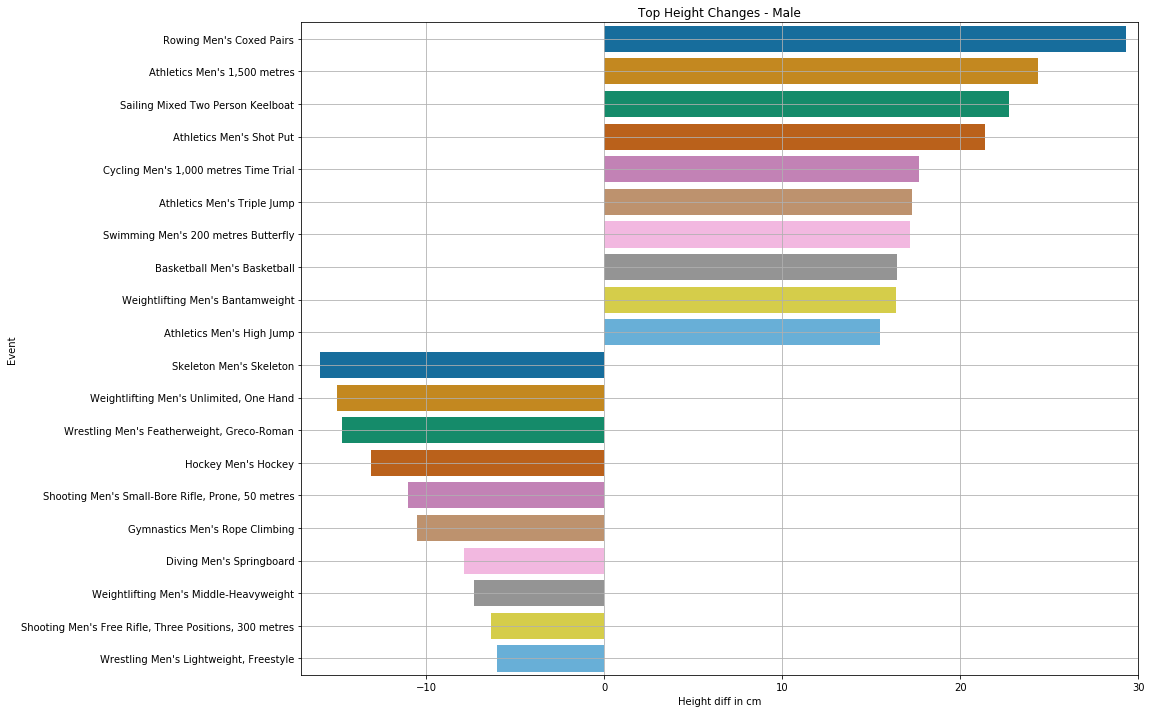

In [88]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedHeightMale['eventFirst'], x=combinedHeightMale['heightDiff'], palette='colorblind')

plt.title("Top Height Changes - Male")
plt.xlabel("Height diff in cm")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-17, 30)

plt.show()

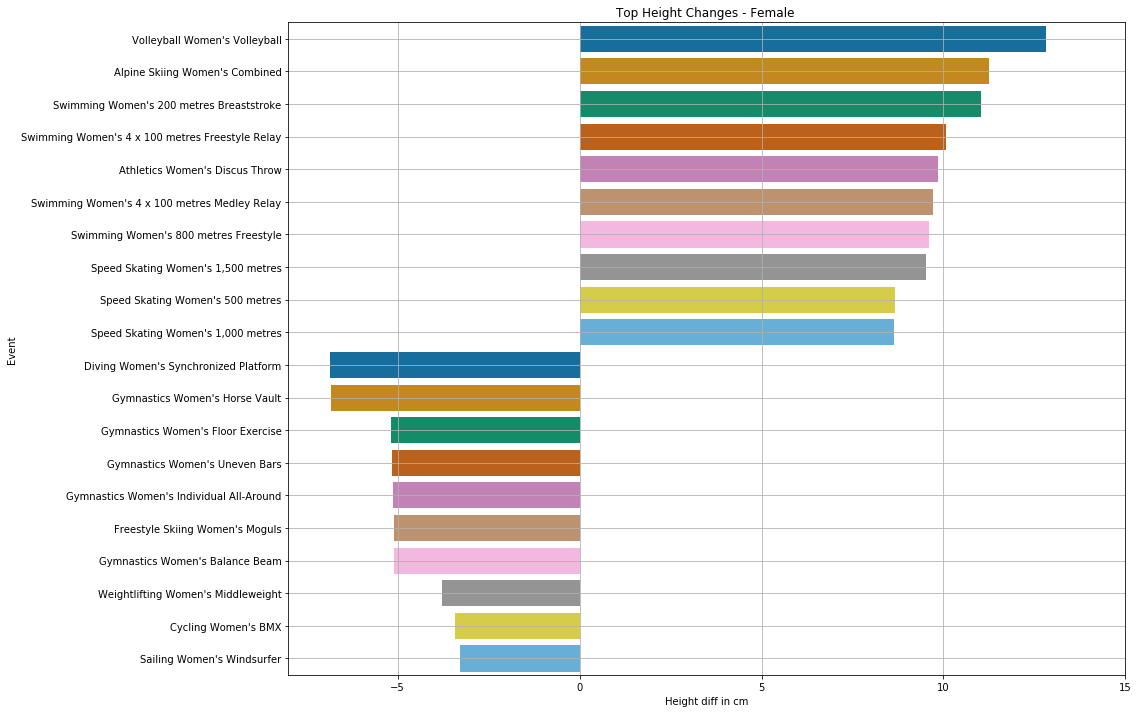

In [89]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedHeightFemale['eventFirst'], x=combinedHeightFemale['heightDiff'], palette='colorblind')

plt.title("Top Height Changes - Female ")
plt.xlabel("Height diff in cm")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-8, 15)

plt.show()

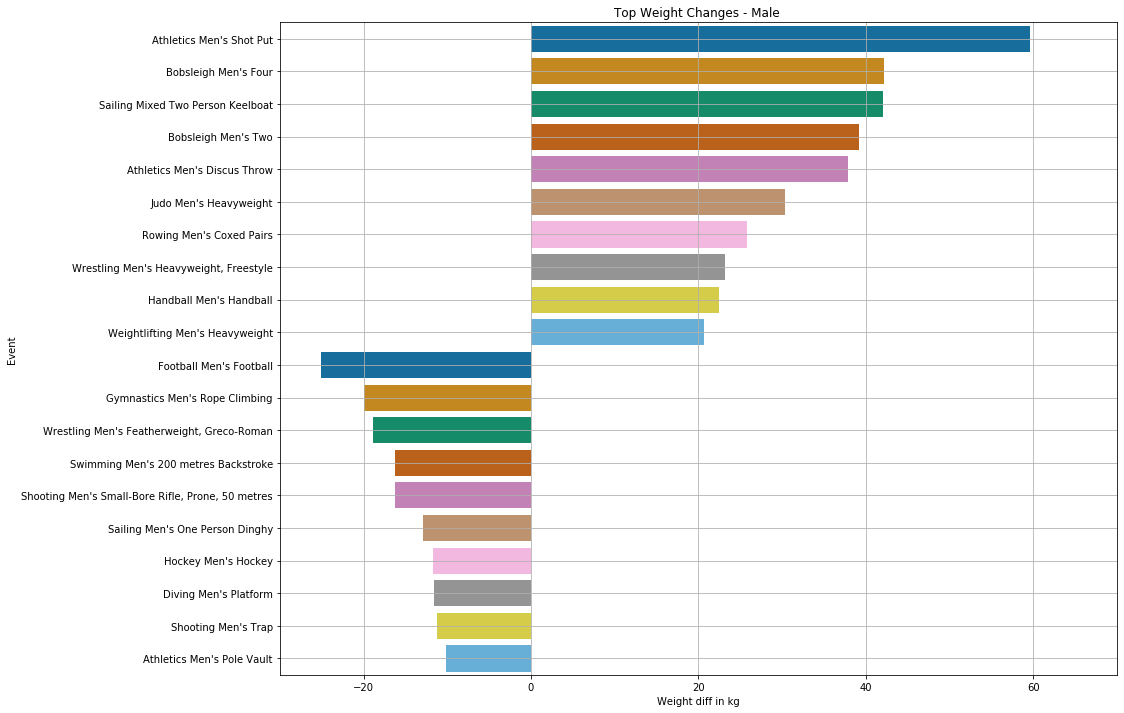

In [90]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedWeightMale['eventFirst'], x=combinedWeightMale['weightDiff'], palette='colorblind')

plt.title("Top Weight Changes - Male ")
plt.xlabel("Weight diff in kg")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-30, 70)

plt.show()

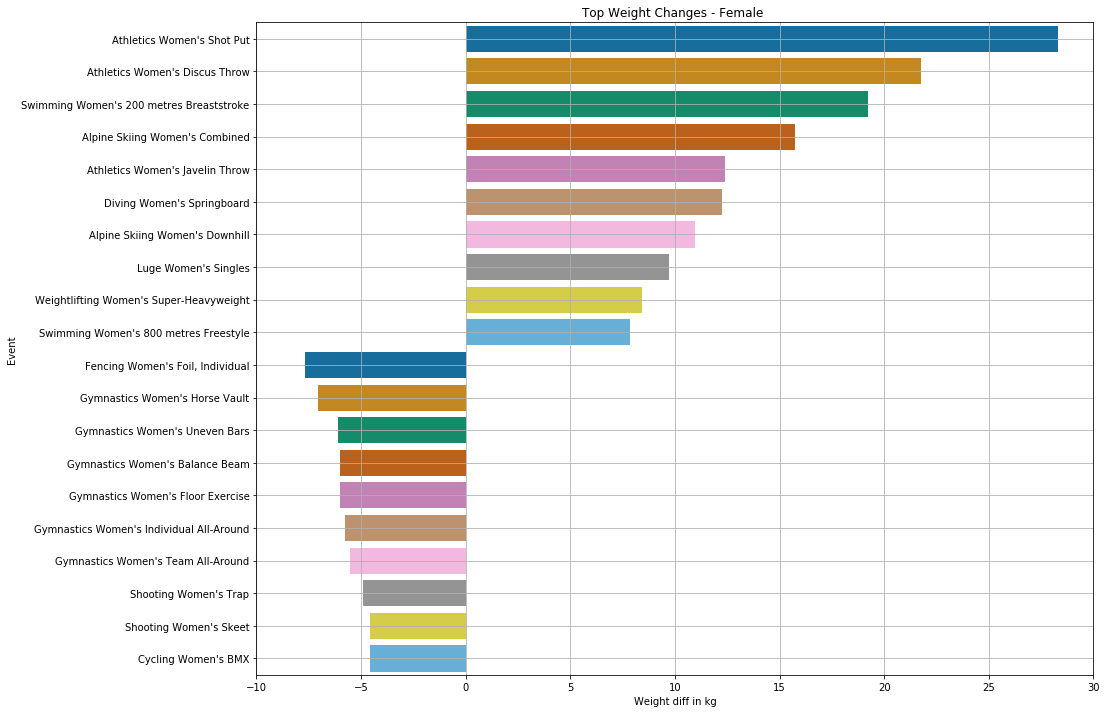

In [91]:
fig = plt.figure(figsize=(15,12))

ax = sns.barplot(y = combinedWeightFemale['eventFirst'], x=combinedWeightFemale['weightDiff'], palette='colorblind')

plt.title("Top Weight Changes - Female ")
plt.xlabel("Weight diff in kg")
plt.ylabel("Event")
plt.grid(True)
ax.set_xlim(-10, 30)

plt.show()